In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
y = df['label']
X = df.drop('label',axis=1)

In [5]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


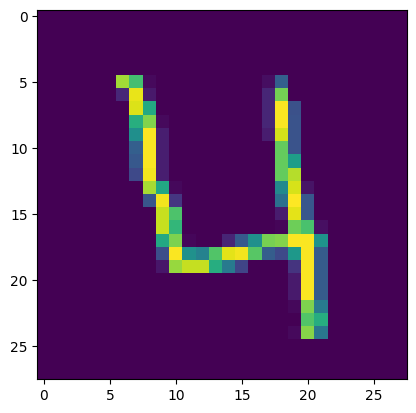

In [6]:
A = X.iloc[3].values.reshape(28,28)
plt.imshow(A)

In [7]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [8]:
X=X.values.reshape(42000,28,28,1)
X.shape

(42000, 28, 28, 1)

In [9]:
#Scale
X_train=X/255

In [10]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
ya = to_categorical(y,num_classes=10)

In [16]:
ya[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [21]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(16,activation='relu', input_shape=(784,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax')) # softmax gives output in probability format

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train,ya,epochs=30,batch_size=64)

Epoch 1/30
657/657 [==============================] - 16s 20ms/step - loss: 0.4875 - accuracy: 0.8466
Epoch 2/30
657/657 [==============================] - 14s 21ms/step - loss: 0.1264 - accuracy: 0.9612
Epoch 3/30
657/657 [==============================] - 14s 22ms/step - loss: 0.0873 - accuracy: 0.9730
Epoch 4/30
657/657 [==============================] - 14s 22ms/step - loss: 0.0673 - accuracy: 0.9792
Epoch 5/30
657/657 [==============================] - 14s 21ms/step - loss: 0.0556 - accuracy: 0.9829
Epoch 6/30
657/657 [==============================] - 14s 21ms/step - loss: 0.0482 - accuracy: 0.9844
Epoch 7/30
657/657 [==============================] - 15s 22ms/step - loss: 0.0427 - accuracy: 0.9863
Epoch 8/30
657/657 [==============================] - 14s 21ms/step - loss: 0.0378 - accuracy: 0.9883
Epoch 9/30
657/657 [==============================] - 14s 22ms/step - loss: 0.0328 - accuracy: 0.9898
Epoch 10/30
657/657 [==============================] - 14s 21ms/step - loss: 0.029

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 16)               

In [17]:
model.evaluate(X_train,ya)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.0907 - accuracy: 0.9744


[0.09065324813127518, 0.9744285941123962]

# Make Predictions

In [23]:
A = X_train[41999].reshape(1,28,28,1)
model.predict_on_batch(A).argmax()

9

In [19]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

# Predictions on real data

In [24]:
# Create your own handwriting in Paint
# Read as numpy array
import cv2 
def get_digit(path):
    A = cv2.imread(path, 0) # gray=0
    A = cv2.resize(A,(28,28))
    A = A/255
    A = A.reshape(1,28,28,1)
    return model.predict_on_batch(A).argmax()

In [25]:
import os

In [26]:
for img in os.listdir('Desktop/rename/'):
    print('Desktop/rename/'+img)

Desktop/rename/0.jpg
Desktop/rename/0.png
Desktop/rename/00.png
Desktop/rename/1.png
Desktop/rename/11.png
Desktop/rename/4.png
Desktop/rename/44.png
Desktop/rename/5.png
Desktop/rename/66.png
Desktop/rename/7.png


In [27]:
for img in os.listdir('Desktop/rename/'):
    y = get_digit('Desktop/rename/'+img)
    print(img,'\t',y)

0.jpg 	 0
0.png 	 9
00.png 	 0
1.png 	 1
11.png 	 1
4.png 	 4
44.png 	 4
5.png 	 5
66.png 	 6
7.png 	 7
